In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from imutils import paths
from tensorflow import keras

In [2]:
images=sorted(list(paths.list_files('Pnuemonia/')))

In [3]:
import cv2

In [4]:
images

['Pnuemonia/.DS_Store',
 'Pnuemonia/Negative/patient00012_study3_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00059_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00063_study3_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00067_study4_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00069_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00069_study2_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00072_study2_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00072_study3_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00156_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00160_study3_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00169_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00169_study2_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00171_study2_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00171_study4_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00172_study3_view1_frontal.jpg',
 'Pnuemonia/Negative/patient00178_study5_view1_frontal.jpg',


In [5]:
test_images=cv2.imread(images[1])
print(type(test_images))
test_images.shape

<class 'numpy.ndarray'>


(320, 322, 3)

In [6]:
# Min and Max Resolutions
width=[]
height=[]
for image in images:
    if image.endswith('.jpg'):
        targetimage=cv2.imread(image)
        width.append(targetimage.shape[0])
        height.append(targetimage.shape[1])
        
len(width)
len(height)

1000

In [7]:
print(min(width),min(height))
print(max(width),max(height))

320 320
390 414


In [8]:
#Load Features and Labels

In [9]:
import random
features=[]
labels=[]

random.shuffle(images)

In [10]:
images

['Pnuemonia/Negative/patient07841_study9_view1_frontal.jpg',
 'Pnuemonia/Negative/patient01077_study6_view1_frontal.jpg',
 'Pnuemonia/Negative/patient03765_study8_view1_frontal.jpg',
 'Pnuemonia/Positive/patient18338_study8_view2_frontal.jpg',
 'Pnuemonia/Negative/patient00806_study2_view1_frontal.jpg',
 'Pnuemonia/Negative/patient05026_study4_view1_frontal.jpg',
 'Pnuemonia/Positive/patient16887_study4_view1_frontal.jpg',
 'Pnuemonia/Positive/patient28706_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/patient06694_study1_view1_frontal.jpg',
 'Pnuemonia/Positive/patient25110_study4_view1_frontal.jpg',
 'Pnuemonia/Positive/patient24382_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/patient05760_study1_view1_frontal.jpg',
 'Pnuemonia/Positive/patient24394_study1_view1_frontal.jpg',
 'Pnuemonia/Positive/patient23614_study5_view1_frontal.jpg',
 'Pnuemonia/Positive/patient16126_study2_view1_frontal.jpg',
 'Pnuemonia/Negative/patient06692_study1_view1_frontal.jpg',
 'Pnuemonia/Negative/pat

In [11]:
for image in images:
    if image.endswith('.jpg'):
        targetimage=cv2.imread(image)
        #targetimage=cv2.cvtColor(targetimage,cv2.COLOR_BAYER_BG2RGB)
        targetimage=cv2.resize(targetimage,(256,256)).flatten()
        features.append(targetimage)
        labels.append(image.split('/')[1])

In [12]:
features

[array([11, 11, 11, ...,  1,  1,  1], dtype=uint8),
 array([ 0,  0,  0, ..., 13, 13, 13], dtype=uint8),
 array([  4,   4,   4, ..., 173, 173, 173], dtype=uint8),
 array([ 4,  4,  4, ..., 14, 14, 14], dtype=uint8),
 array([10, 10, 10, ..., 96, 96, 96], dtype=uint8),
 array([ 7,  7,  7, ..., 13, 13, 13], dtype=uint8),
 array([97, 97, 97, ..., 10, 10, 10], dtype=uint8),
 array([ 4,  4,  4, ..., 12, 12, 12], dtype=uint8),
 array([183, 183, 183, ...,  37,  37,  37], dtype=uint8),
 array([13, 13, 13, ..., 15, 15, 15], dtype=uint8),
 array([32, 32, 32, ..., 15, 15, 15], dtype=uint8),
 array([ 47,  47,  47, ..., 254, 254, 254], dtype=uint8),
 array([  6,   6,   6, ..., 111, 111, 111], dtype=uint8),
 array([122, 122, 122, ..., 234, 234, 234], dtype=uint8),
 array([41, 41, 41, ..., 19, 19, 19], dtype=uint8),
 array([ 1,  1,  1, ..., 23, 23, 23], dtype=uint8),
 array([244, 244, 244, ..., 123, 123, 123], dtype=uint8),
 array([2, 2, 2, ..., 6, 6, 6], dtype=uint8),
 array([237, 237, 237, ...,  40,  

In [13]:
labels

['Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',

In [14]:
import numpy as np
features=np.array(features)
labels=np.array(labels)


In [15]:
features

array([[ 11,  11,  11, ...,   1,   1,   1],
       [  0,   0,   0, ...,  13,  13,  13],
       [  4,   4,   4, ..., 173, 173, 173],
       ...,
       [ 56,  56,  56, ...,  26,  26,  26],
       [ 15,  15,  15, ...,  10,  10,  10],
       [ 15,  15,  15, ...,   1,   1,   1]], dtype=uint8)

In [16]:
# Normalizing Pixel Values
features=features/255.0

In [17]:
features

array([[0.04313725, 0.04313725, 0.04313725, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.05098039, 0.05098039,
        0.05098039],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.67843137, 0.67843137,
        0.67843137],
       ...,
       [0.21960784, 0.21960784, 0.21960784, ..., 0.10196078, 0.10196078,
        0.10196078],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.00392157, 0.00392157,
        0.00392157]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
(trainX,testX,trainY,testY)=train_test_split(features,labels,test_size=0.20)

In [20]:
trainX.shape

(800, 196608)

In [21]:
testX.shape

(200, 196608)

In [22]:
trainY

array(['Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positi

In [23]:
#One Hot Encoding
from sklearn.preprocessing import LabelBinarizer

In [24]:
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.fit_transform(testY)

In [25]:
trainY

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [26]:
#CNN

In [27]:
from keras.preprocessing.image import ImageDataGenerator

training_generator=ImageDataGenerator(rescale=1/255.0,validation_split=0.25)

In [28]:
type(training_generator)

keras.preprocessing.image.ImageDataGenerator

In [29]:
training=training_generator.flow_from_directory('Pnuemonia/',target_size=(256,256),batch_size=32,class_mode='categorical',subset='training')

Found 750 images belonging to 2 classes.


In [30]:
validation=training_generator.flow_from_directory('Pnuemonia/',target_size=(256,256),batch_size=32,class_mode='categorical',subset='validation')

Found 250 images belonging to 2 classes.


In [31]:
#import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [32]:
model=Sequential()
# First COnv Layer
model.add(Conv2D(16,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.20))
# Second Conv Layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.20))

# third Conv Layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [34]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [35]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [36]:
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=2,
    mode='auto', baseline=None, restore_best_weights=True
)

In [37]:
model.compile(
    optimizer=adam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [38]:
callbacks_list = [earlystopping]
history=model.fit(training,validation_data=validation,epochs=20,callbacks = [callbacks_list])

Epoch 1/20
24/24 [==============================] - 27s 1s/step - loss: 1.6236 - accuracy: 0.5160 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
24/24 [==============================] - 27s 1s/step - loss: 0.6931 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
24/24 [==============================] - 25s 1s/step - loss: 0.6927 - accuracy: 0.5373 - val_loss: 0.6928 - val_accuracy: 0.5400
Epoch 4/20
24/24 [==============================] - 23s 964ms/step - loss: 0.6860 - accuracy: 0.5707 - val_loss: 0.6844 - val_accuracy: 0.5560
Epoch 5/20
24/24 [==============================] - 23s 968ms/step - loss: 0.6548 - accuracy: 0.6280 - val_loss: 0.6875 - val_accuracy: 0.5800
Epoch 6/20
24/24 [==============================] - 23s 971ms/step - loss: 0.6190 - accuracy: 0.6693 - val_loss: 0.7180 - val_accuracy: 0.5760
Epoch 7/20
24/24 [==============================] - 23s 969ms/step - loss: 0.5875 - accuracy: 0.6933 - val_loss: 0.6989 - val_accuracy: 0.5680
Epoch 8/

In [39]:
targetimage

array([15, 15, 15, ...,  1,  1,  1], dtype=uint8)

In [40]:
validation.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [43]:
targetimage=cv2.imread('LungXray.jpg')
targetimage=cv2.resize(targetimage,(256,256))

In [44]:
targetimage.shape

(256, 256, 3)

In [45]:
model.predict(targetimage.reshape(-1,256,256,3))

array([[0.47105777, 0.52894217]], dtype=float32)

In [46]:
model.predict(testX[10].reshape(-1,256,256,3))

array([[0.47540686, 0.5245931 ]], dtype=float32)

In [47]:
testY[10]

array([1])

In [48]:
model.predict(testX[78].reshape(-1,256,256,3))

array([[0.56872225, 0.4312777 ]], dtype=float32)

In [49]:
testY[78]

array([0])

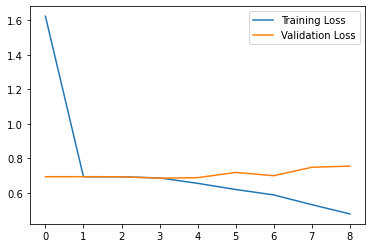

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend({'Training Loss':'0','Validation Loss':'1'})

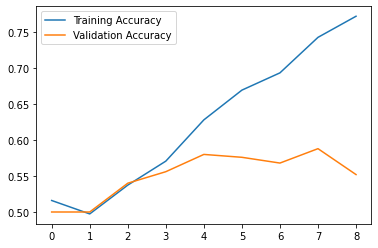

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend({'Training Accuracy':'0','Validation Accuracy':'1'})